torch.Size([1, 480, 479])
torch.Size([1, 1, 480, 479])


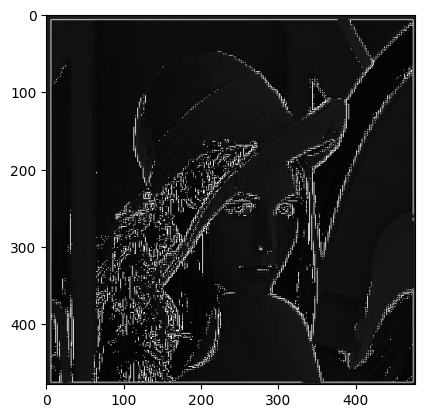

In [3]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch as t
#预处理模块
from PIL import Image
image=Image.open("./images/2023_6_30.jpg")
# plt.imshow(image)
# plt.show()
"""
这是一个用于边缘检测的卷积核。在这个卷积核中，中心元素是1，
表示当前位置的像素值对边缘检测有贡献，而周围的元素都是-0.1111，
表示对边缘检测没有贡献。这样的卷积核可以帮助我们提取图像中的垂直边缘特征。
"""
kernel=t.Tensor(
        [[-0.1111, -0.1111, -0.1111],
        [-0.1111,  1.0000, -0.1111],
        [-0.1111, -0.1111, -0.1111]],
)
kernel=t.ones(3,3)/-9
kernel[1][1]=1
#转换成灰度图
image=image.convert("L")
#转换成张量
imageTensor=transforms.ToTensor()(image)
print(imageTensor.shape)
#在第0个维度添加一个一维表示批次数据
input=imageTensor.unsqueeze(0)
print(input.shape)
layer=nn.Conv2d(1,1,(3,3),bias=False)
# 定义输入张量shape为(batch_size, channels, height, width)
layer.weight.data=kernel.view(1,1,3,3)
output=layer(input)
plt.imshow(transforms.ToPILImage()(output.squeeze(0)),cmap="gray")
plt.show()

#池化层



